# T-test Activities
#### In this file I go over several t-test variations. Not all the assumptions are met through out the activities, but are over looked as the purpose of this file is to familarize myself with t-test in python. 

## Single Sample T-test

### Load in Packages and Data

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind

In [3]:
hybrid = pd.read_excel('hybrid2013.xlsx')
hybrid.head()

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,111,Prius C,2013,19080,8.70,50,50,C,1
1,112,Jetta,2013,24995,12.66,45,45,C,1
2,113,Civic,2013,24360,10.20,44,44,C,1
3,114,Prius,2013,24200,10.20,50,50,M,3
4,115,Fusion FWD,2013,27200,11.72,47,47,M,3


### Test Assumptions

<AxesSubplot:>

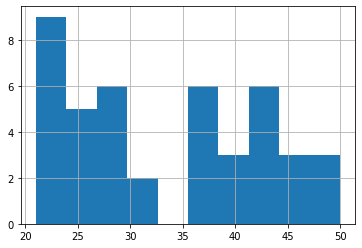

In [4]:
hybrid['mpg'].hist()

#### Assumption not met, but will continue anyway for educational purposes.
### Run Analysis

In [6]:
stats.ttest_1samp(hybrid['mpg'], 40)

Ttest_1sampResult(statistic=-4.427320491687408, pvalue=6.67005084670698e-05)

#### Our t-test is significant, now to compare it to the mean. 

In [7]:
hybrid.mpg.mean()

33.48837209302326

#### Conclusion: A hybrid car from 2013 with a mpg of 40 is significantly higher than the average 2013 hybrid mpg. 

## Independent T-test

### Test Assumptions

<AxesSubplot:>

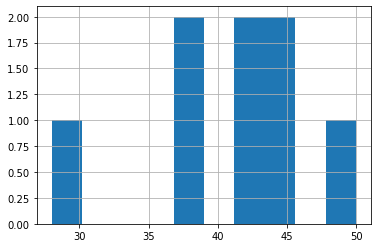

In [8]:
hybrid.mpg[hybrid.carclass == 'C'].hist()

<AxesSubplot:>

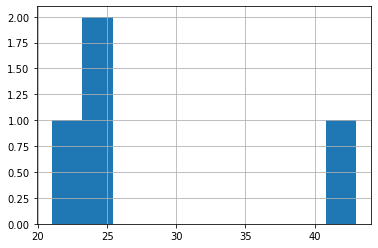

In [9]:
hybrid.mpg[hybrid.carclass == 'L'].hist()

#### Neither are normally distributed, but we shall continue for educational purposes.
### Run Analysis

In [12]:
ttest_ind(hybrid.mpg[hybrid.carclass == 'C'], hybrid.mpg[hybrid.carclass == 'L'])

Ttest_indResult(statistic=2.598820461640718, pvalue=0.026545168887970094)

#### Our p-value is significant. 
### Compare Means

In [13]:
hybrid.mpg[hybrid.carclass == 'L'].mean()

28.5

In [14]:
hybrid.mpg[hybrid.carclass == 'C'].mean()

40.75

#### Conclusion: There is a significant difference between the mpg values of compact and large hybrid car, with compact cars having a higher mpg. 

## Dependent T-test
### Import Data

In [16]:
hybriddep = pd.read_excel('hybrid2012-13.xlsx')
hybriddep.head()

,vehicle,msrp2012,accelrate2012,mpg2012,mpgmpge2012,carclass2012,carclass_id2012,msrp2013,accelrate2013,mpg2013,mpgmpge2013,carclass2013,carclass_id2013
0,ActiveHybrid 3,19006.62,9.35,50,50,C,1,19080,8.70,50,50,C,1
1,ActiveHybrid 5,32095.61,8.82,50,95,M,3,24995,12.66,45,45,C,1
2,Ampera,31739.55,11.11,37,98,C,1,24200,10.20,50,50,M,3
3,Camry LE,62180.23,16.67,26,26,M,3,18600,11.76,42,42,C,1
4,Chevrolet Volt,59126.14,16.95,31,31,M,3,69850,16.39,21,21,SUV,6


<AxesSubplot:>

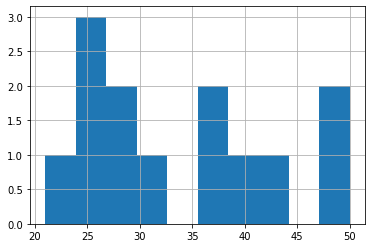

In [17]:
hybriddep['mpg2012'].hist()

<AxesSubplot:>

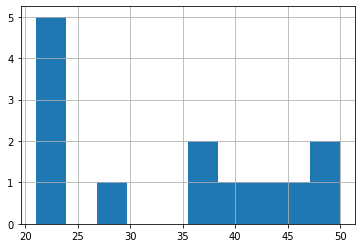

In [18]:
hybriddep['mpg2013'].hist()

#### Data is not normally distributed, but we will continue for educational purposes.
### Run Analysis

In [19]:
stats.ttest_rel(hybriddep['mpg2012'], hybriddep['mpg2013'])

Ttest_relResult(statistic=0.14466598084438312, pvalue=0.8873759030512349)

#### Our p-value is not significant. There is not a significant diffenece in the mean of hybrid mpg cars between 2012 and 2013.